#  Unsupervised Clustering on Well Log Data

In this tutorial we will be carrying out unsupervised learning classification using two clustering methods (K Means Clustering, Gaussian Mixture Modelling) and comparing the results with an established Lithofacies curve.

## Clustering 
Clustering is a common form of exploratory data analysis. It divides data into different groups based on shared characteristics without any prior user input/instruction. Data points that are sufficiently similar are grouped in clusters.

This is a great approach to try to 'make sense' from data. But what does it mean to 'make sense'? This come from domain expertise. Remember, data alone has no meaning, they are just numbers, it doesn't matter if they can be grouped together if there is not a rational fro which this grouping would have any meaning (thus value).
Assumption:

Clustering hyphotesis: data points behave similarly with respect to relevance to information needs.

### K-Means Clustering

K-Means clustering is one of the most common unsupervised machine learning algorithms. It uses a K parameter as input, which is the number of clusters to generate. The algorithm then groups data into K clusters by locating each cluster centroid by minimising the distance between data points and a centroid.

The alorithm uses an iterative procedure. Centroids are initially located at K random points in the data space and all data points are then assigned to a cluster based on their distance to the centroid. New centroid coordinates are recalculated as the central point of the cluster. Data points are then reassigned again according to the distance. This continues until either there is no change in the centroids or the points remain in the same cluster or until a maximum number of iterations is reached.

K-Means is a hard clustering method where a data point either belongs to a cluster or it does not. It can handle both numerical and categorical data.

### Gaussian Mixture Modelling

The GMM method is based on data variance, resulting in a 'soft' distribution based classification: each data point has a probability of belonging to one cluster or another.
Method comparison

While K-Means clustering works great if the data clusters are circular, however, in petrophysical and geological situations data rarely forms nice circular patterns. GMM modelling uses eliptical shaped cluster/decision boundaries and are therefore more flexible, but the algorithm might not be able to converge to a stationary solution.

An excellent article looking at the differences between the two methods can be found at https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/

## Dataset

The dataset we are using for this tutorial forms part of a Machine Learning competition run by Xeek and FORCE 2020 (https://doi.org/10.5281/zenodo.4351155). The objective of the compettion was to predict lithology from existing labelled data. The dataset consists of 118 wells from the Norwegian Sea.


#### Importing Libraries & Data Loading

The first step of the project is to import the libraries that we require. For this example we will be using NumPy for working with arrays, pandas for storing data, seaborn and matplotlib for displaying the data.


In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as colors

In [2]:
# Load the dataset
df = pd.read_csv("../../data/xeek_train_subset_mini.csv")

In [3]:
# Row and Column Numbers
df.shape

(38841, 9)

In [28]:
# Column names
df.columns

Index(['WELL', 'DEPTH_MD', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC',
       'FORCE_2020_LITHOFACIES_LITHOLOGY'],
      dtype='object')

To keep our model simple we will work with four logging measurements (columns): Gamma Ray (GR), Bulk Density (RHOB), Neutron Porosity (NPHI) and Acoustic Compressional Slowness (DTC).

In [29]:
# Select the columns
workingdf = df[["WELL", "DEPTH_MD", "RHOB", "GR", "NPHI", "PEF", "DTC", "FORCE_2020_LITHOFACIES_LITHOLOGY"]].copy()

In [6]:
# Rename Column
workingdf.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY':'FACIES'}, inplace=True)

In [7]:
# View the Dataframe
workingdf

,WELL,DEPTH_MD,RHOB,GR,NPHI,PEF,DTC,FACIES
0,15/9-13,494.528000,1.884186,80.200851,NaN,20.915468,161.131180,65000
1,15/9-13,494.680000,1.889794,79.262886,NaN,19.383013,160.603470,65000
2,15/9-13,3231.440000,2.532774,94.768181,0.305614,NaN,80.889732,65000
3,15/9-13,3231.592000,2.531526,96.184753,0.293033,NaN,80.707405,65000
4,15/9-17,1088.789998,NaN,68.692322,0.581423,NaN,141.185333,65000
...,...,...,...,...,...,...,...,...
38836,16/10-5,3026.524387,2.409457,37.617256,NaN,5.624291,NaN,30000
38837,16/10-5,3026.676387,2.372795,33.340351,NaN,5.383541,NaN,30000
38838,16/10-5,3026.828387,2.350574,30.836288,NaN,5.324181,NaN,30000
38839,16/10-5,3026.980387,2.344591,29.798063,NaN,5.310557,NaN,30000


In [8]:
# Unique values from columns
workingdf['FACIES'].unique()

array([65000, 65030, 30000, 70000, 99000, 80000, 70032, 74000, 90000,
       88000])

In [9]:
# Assign names to values
lithology_numbers = {30000: 'Sandstone',
                     65030: 'Sandstone/Shale',
                     65000: 'Shale',
                     80000: 'Marl',
                     74000: 'Dolomite',
                     70000: 'Limestone',
                     70032: 'Chalk',
                     88000: 'Halite',
                     86000: 'Anhydrite',
                     99000: 'Tuff',
                     90000: 'Coal'}

In [10]:
# Assign mapped values in new column
workingdf['LITH'] = workingdf['FACIES'].map(lithology_numbers)


In [11]:
# View the dataframe
workingdf

,WELL,DEPTH_MD,RHOB,GR,NPHI,PEF,DTC,FACIES,LITH
0,15/9-13,494.528000,1.884186,80.200851,NaN,20.915468,161.131180,65000,Shale
1,15/9-13,494.680000,1.889794,79.262886,NaN,19.383013,160.603470,65000,Shale
2,15/9-13,3231.440000,2.532774,94.768181,0.305614,NaN,80.889732,65000,Shale
3,15/9-13,3231.592000,2.531526,96.184753,0.293033,NaN,80.707405,65000,Shale
4,15/9-17,1088.789998,NaN,68.692322,0.581423,NaN,141.185333,65000,Shale
...,...,...,...,...,...,...,...,...,...
38836,16/10-5,3026.524387,2.409457,37.617256,NaN,5.624291,NaN,30000,Sandstone
38837,16/10-5,3026.676387,2.372795,33.340351,NaN,5.383541,NaN,30000,Sandstone
38838,16/10-5,3026.828387,2.350574,30.836288,NaN,5.324181,NaN,30000,Sandstone
38839,16/10-5,3026.980387,2.344591,29.798063,NaN,5.310557,NaN,30000,Sandstone


## Visualize the data -- Scatterplot grid

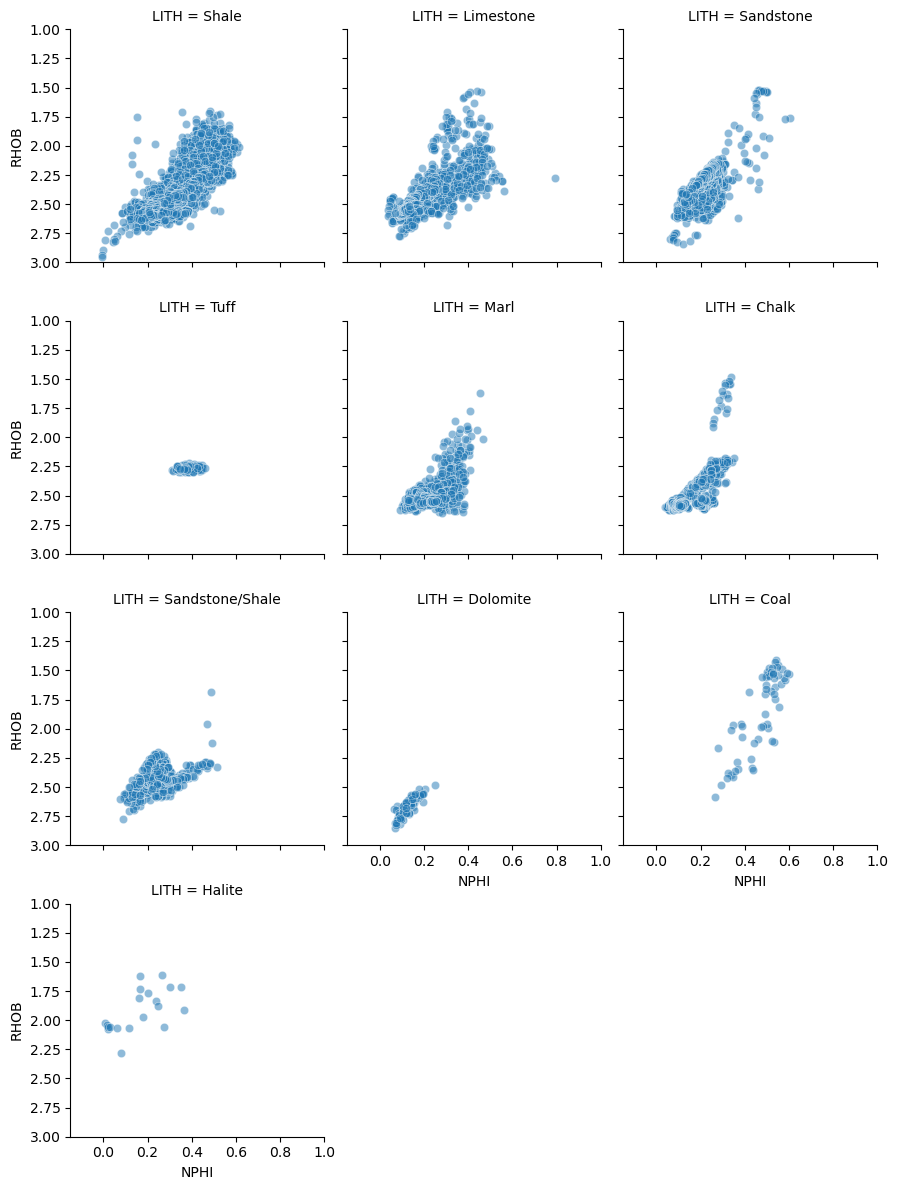

In [27]:
# RHOB Density
# NPHI Porosity (the hydrogen index in a reservoir, which is directly related to porosity. )

g = sns.FacetGrid(workingdf, col='LITH', col_wrap=3)
g.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.5)
g.set(xlim=(-0.15, 1))
g.set(ylim=(3, 1))

### Create Plot function

In [13]:
def create_plot(wellname, dataframe, curves_to_plot, depth_curve, facies_curves=[]):
    # Count the number of tracks we need
    num_tracks = len(curves_to_plot)
    
    cmap = plt.get_cmap('tab20')  
    facies_color = cmap(np.linspace(0, 1, 11))
            
    # Setup the figure and axes
    fig, ax = plt.subplots(nrows=1, ncols=num_tracks, figsize=(num_tracks*2, 10))
    
    # Create a super title for the entire plot
    fig.suptitle(wellname, fontsize=20, y=1.05)
    
    # Loop through each curve in curves_to_plot and create a track with that data
    for i, curve in enumerate(curves_to_plot):
        if curve in facies_curves:
            cmap_facies = colors.ListedColormap(facies_color[0: dataframe[curve].max()], 'indexed')
            
            cluster=np.repeat(np.expand_dims(dataframe[curve].values, 1), 100, 1)
            im=ax[i].imshow(cluster, interpolation='none', cmap=cmap_facies, aspect='auto',vmin=dataframe[curve].min(),vmax=dataframe[curve].max(), 
                            extent=[0,20, depth_curve.max(), depth_curve.min()])
            

               
        else:
            ax[i].plot(dataframe[curve], depth_curve)

        
        # Setup a few plot cosmetics
        ax[i].set_title(curve, fontsize=14, fontweight='bold')
        ax[i].grid(which='major', color='lightgrey', linestyle='-')
        
        # We want to pass in the deepest depth first, so we are displaying the data from shallow to deep
        ax[i].set_ylim(depth_curve.max(), depth_curve.min())


        # Only set the y-label for the first track. Hide it for the rest
        if i == 0:
            ax[i].set_ylabel('DEPTH (m)', fontsize=18, fontweight='bold')
        else:
            plt.setp(ax[i].get_yticklabels(), visible = False)
          

    
    plt.tight_layout()
    plt.show()
    
    return cmap_facies

### Splitting Data by Well Function

In [14]:

def well_splitter(dataframe, groupby_column):
    grouped = dataframe.groupby(groupby_column)
    
    # Create empty lists
    wells_as_dfs = []
    wells_wellnames = []

    #Split up the data by well
    for well, data in grouped:
        wells_as_dfs.append(data)
        wells_wellnames.append(well)

    print('index  wellname')
    for i, name in enumerate(wells_wellnames):
        print(f'{i}      {name}')
    
    return wells_as_dfs, wells_wellnames

# Clustering - Unsupervised

In [15]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

## Optimal number of cluster
    

In [16]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

In [17]:
# Drop Null values
workingdf.dropna(inplace=True)

To keep our model simple we will work with four logging measurements (columns): Gamma Ray (GR), Bulk Density (RHOB), Neutron Porosity (NPHI) and Acoustic Compressional Slowness (DTC).

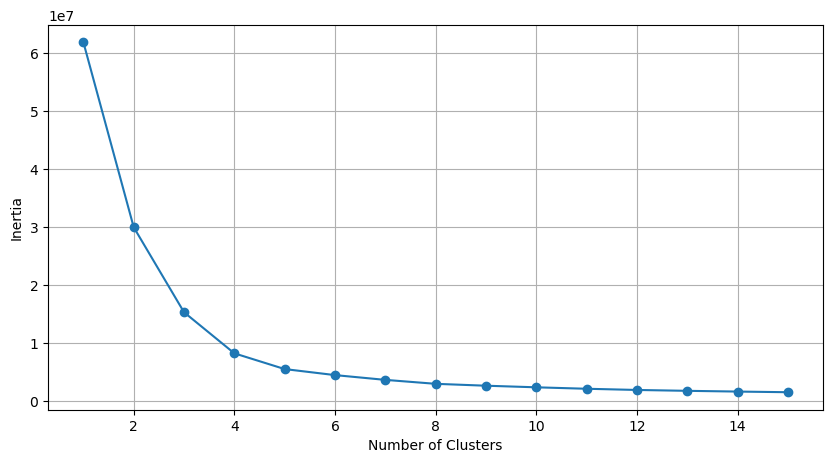

In [18]:
optimise_k_means(workingdf[['GR', 'RHOB', 'NPHI', 'DTC']], 16)

In the plot above, we can see that the inertia (sum of the squared distances to the nearest cluster center) decreases as we increase the number of clusters. There is no clear defined break within this dataset, however, we can see that the slope changes from about 5 clusters onwards. The picking of this value will be dependent on the interpreter and could range from 4 to 10.

So for this example we will take 5 as the optimum number of clusters.

## Fitting the Clustering Models

In [19]:
# Create the KMeans model with the selected number of clusters
kmeans = KMeans(n_clusters=5)

# Fit the model to our dataset
kmeans.fit(workingdf[['GR', 'RHOB', 'NPHI', 'DTC']])

# Assign the data back to the workingdf
workingdf['KMeans'] = kmeans.labels_

To make the comparison simple, we will use the same number of clusters in the Gaussian Mixture Model. For this model the number of clusters parameter is known as n_components.

In [20]:
# Create the gmm model with the selected number of clusters/components
gmm = GaussianMixture(n_components=5)

# Fit the model to our dataset
gmm.fit(workingdf[['GR', 'RHOB', 'NPHI', 'DTC']])

# Predict the labels
gmm_labels = gmm.predict(workingdf[['GR', 'RHOB', 'NPHI', 'DTC']])

# Assign the labels back to the workingdf
workingdf['GMM'] = gmm_labels

## Plotting the Results

Now that the clusters have been computed using KMeans and GMM methods, we can plot the data to see how well the predicted in relation to the labelled lithologies. Note that these methods are unsupervised and do not use the labelled data for training. We are comparing here how well unsupervised methods perform with well log data.

In [21]:
dfs_wells, wellnames = well_splitter(workingdf, 'WELL')

index  wellname
0      16/10-1
1      16/10-2
2      16/10-3
3      16/10-5


The first plot we will look at is the logplot. We will pass in the original lithofacies (LITH_SI) column and the newly computed KMeans and GMM results.

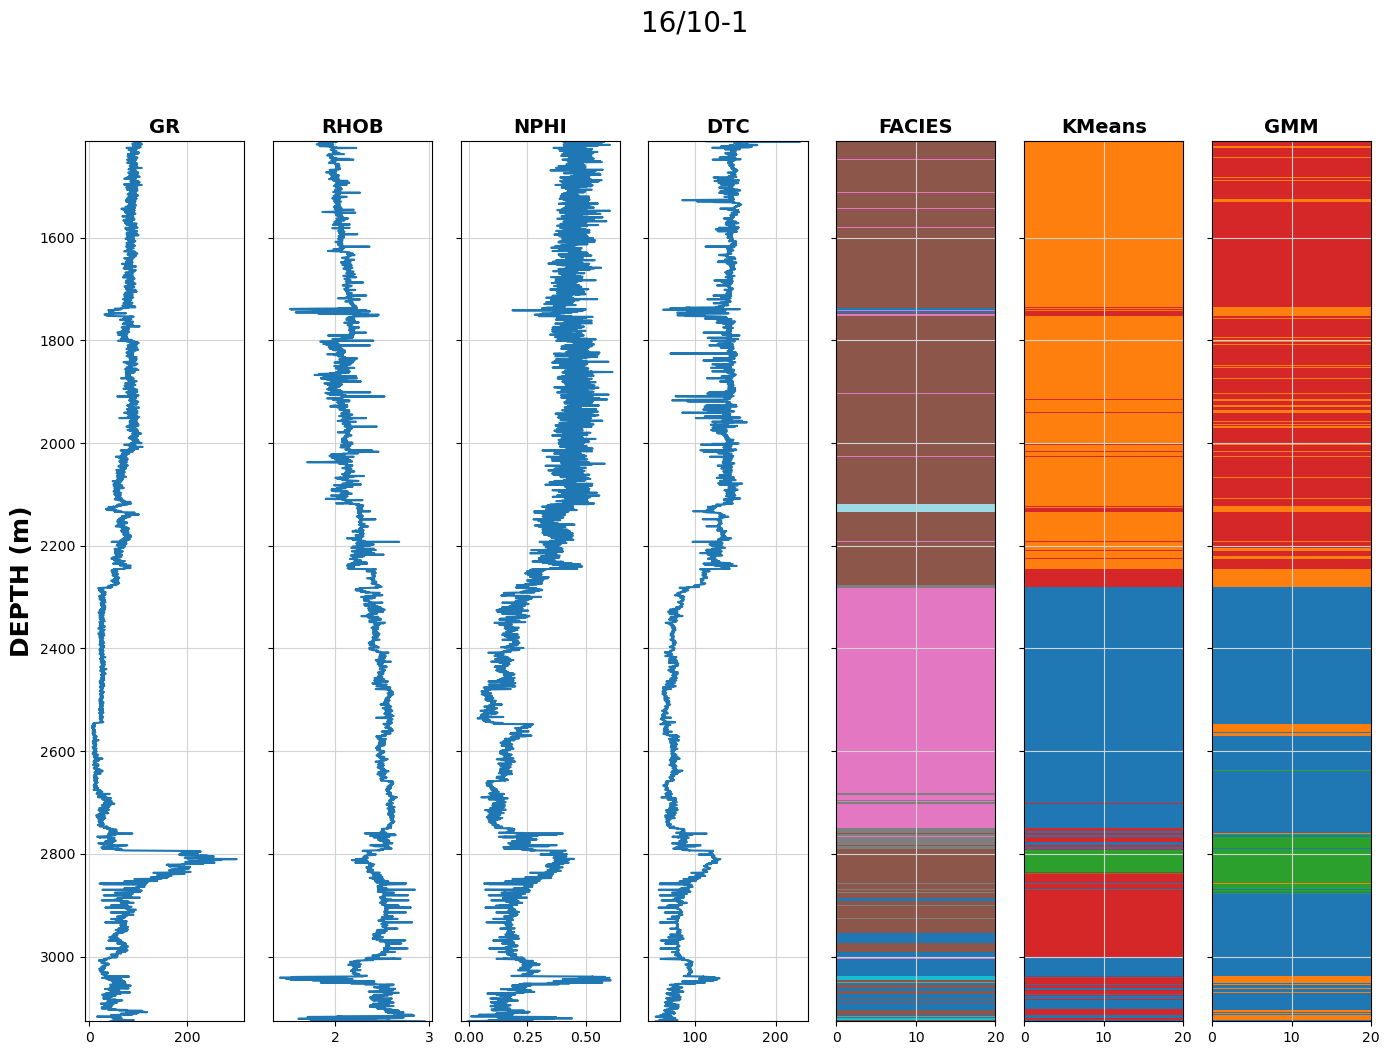

In [22]:
# Setup the curves to plot
curves_to_plot = ['GR', 'RHOB', 'NPHI', 'DTC',  'FACIES', 'KMeans','GMM']
facies_curve = ['KMeans','GMM', 'FACIES']

# Create plot by passing in the relevant well index number
well = 0
cmap_facies = create_plot(wellnames[well], 
            dfs_wells[well], 
            curves_to_plot, 
            dfs_wells[well]['DEPTH_MD'], 
            facies_curve)

In the plot above we have the original Lithology and our computed KMeans and GMM cluster results in the last three subplots. 

The first thing to note is that the colours do not neccessarily mean the data is from the same group across each method. As each cluster has no meaning, the algorithm is unable to reproduce the same FACIES. That shall be a post-processing operation that could be done if of interest.

Looking at well 16/10-1 (index 4), we have 10 separate facies/groups displayed and we can see that these mostly tie up with the changes in the logging measurements. For example the decrease in Gamma Ray (GR) from around 2300m to around 2775m ties nicely grouping. In the KMeans and GMM models, this section has also been highlighted as being in the same cluster in both methods, however, there is no variation in this section. As both of these methods were set to a max of 5 clusters, we will not be able to capture the same degree of variation.

To resolve this, we could increase the number of clusters.

### Viewing Results on Scatterplots / Crossplots

Another way to view the performance of the clustering is through scatter plots. We can do this using the common density-neutron scatterplots / crossplots and using matplotlib.

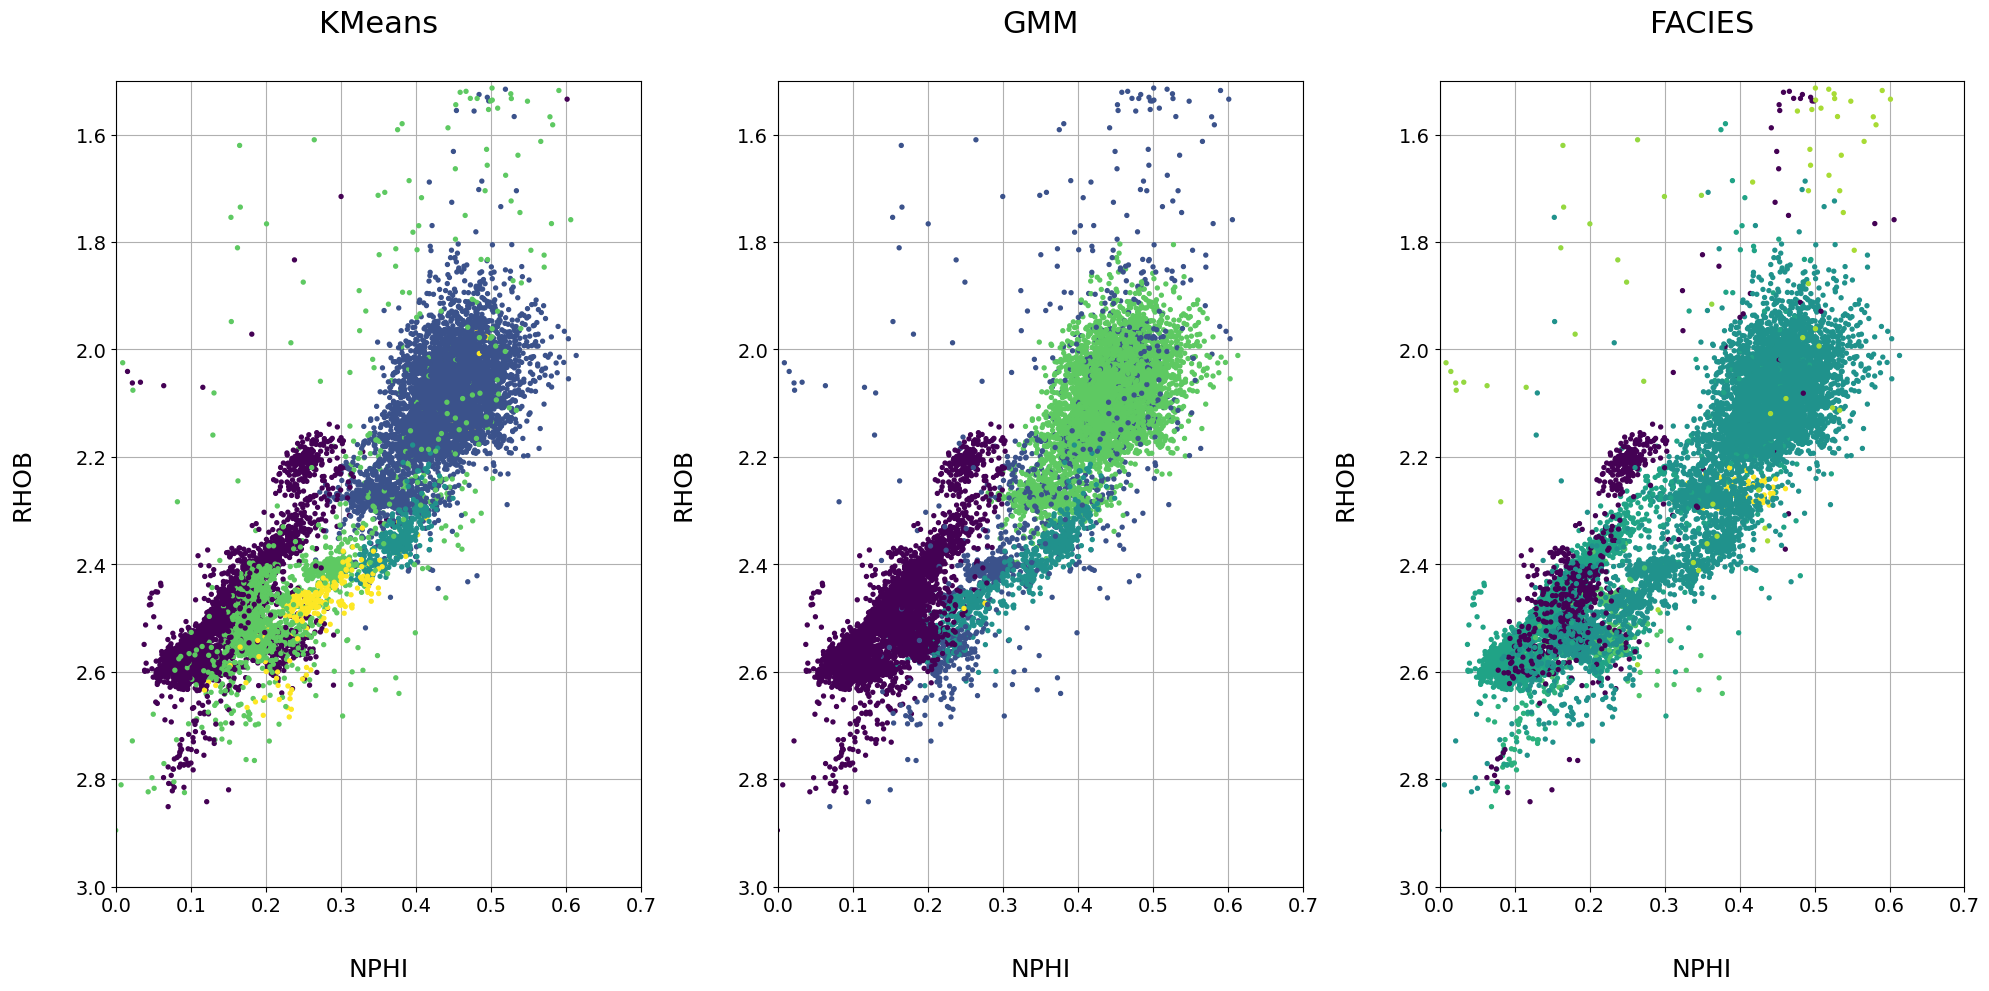

In [23]:
fig, ax = plt.subplots(figsize=(20,10))

ax.remove()
ax1 = plt.subplot2grid((1,3), (0,0))
ax2 = plt.subplot2grid((1,3), (0,1))
ax3 = plt.subplot2grid((1,3), (0,2))

for ax, title in zip([ax1, ax2, ax3], ['KMeans', 'GMM', 'FACIES']):
    ax.scatter(dfs_wells[well]['NPHI'], dfs_wells[well]['RHOB'], c=dfs_wells[well][title], s=8)
    ax.set_xlim(0, 0.7)
    ax.set_ylim(3, 1.5)
    ax.set_ylabel('RHOB', fontsize=18, labelpad=30)
    ax.set_xlabel('NPHI', fontsize=18, labelpad=30)
    ax.set_title(title, fontsize=22, y=1.05)                 
    ax.grid()
    ax.set_axisbelow(True)

    ax.tick_params(axis='both', labelsize=14)
plt.tight_layout()

Even though there is mixing of the clusters in each method, the interval that was discussed in the log plot section can be identified in the lower left of the plot, where we have higher density values and lower neutron porosity values.

In the KMeans grouping, this cluster shows as one complete cluster, however, in the GMM method we can see it matches closer to the supplied lithology.

### Viewing Results on a Pairplot
As we used four input curves for our model, we should look at all of these to see how the clusters vary. The best way to do this is to use the excellent pairplot from the seaborn library. This plot displays the relationships between the data in the dataset on a grid. This allows a quick and easy way to identify and visualise the data.

The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

As we are looking at well number 4 we need to pass in that dataframe to the pairplot (dfs_wells[4])

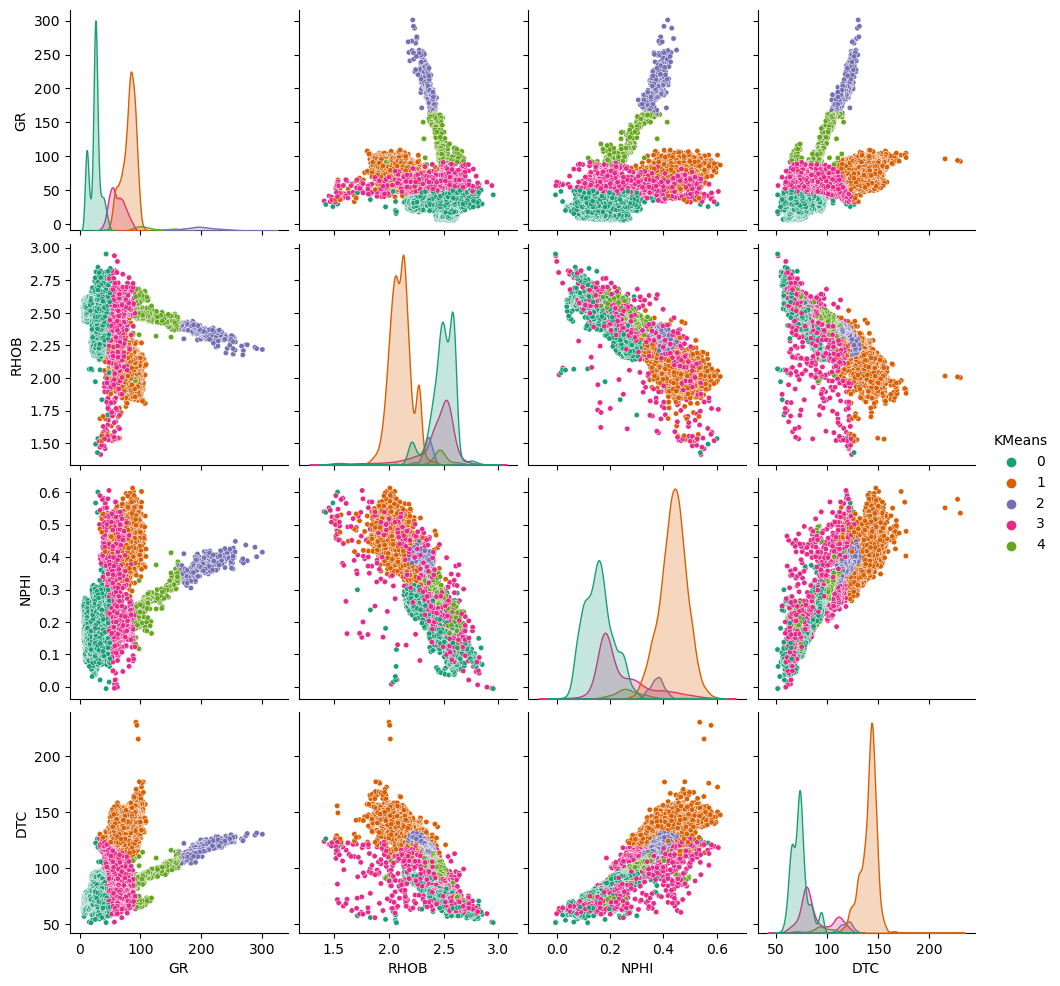

In [24]:
sns.pairplot(dfs_wells[0], vars=['GR', 'RHOB','NPHI', 'DTC'], hue='KMeans', palette='Dark2',
             diag_kind='kde', plot_kws = {'s': 15, 'marker':'o', 'alpha':1})

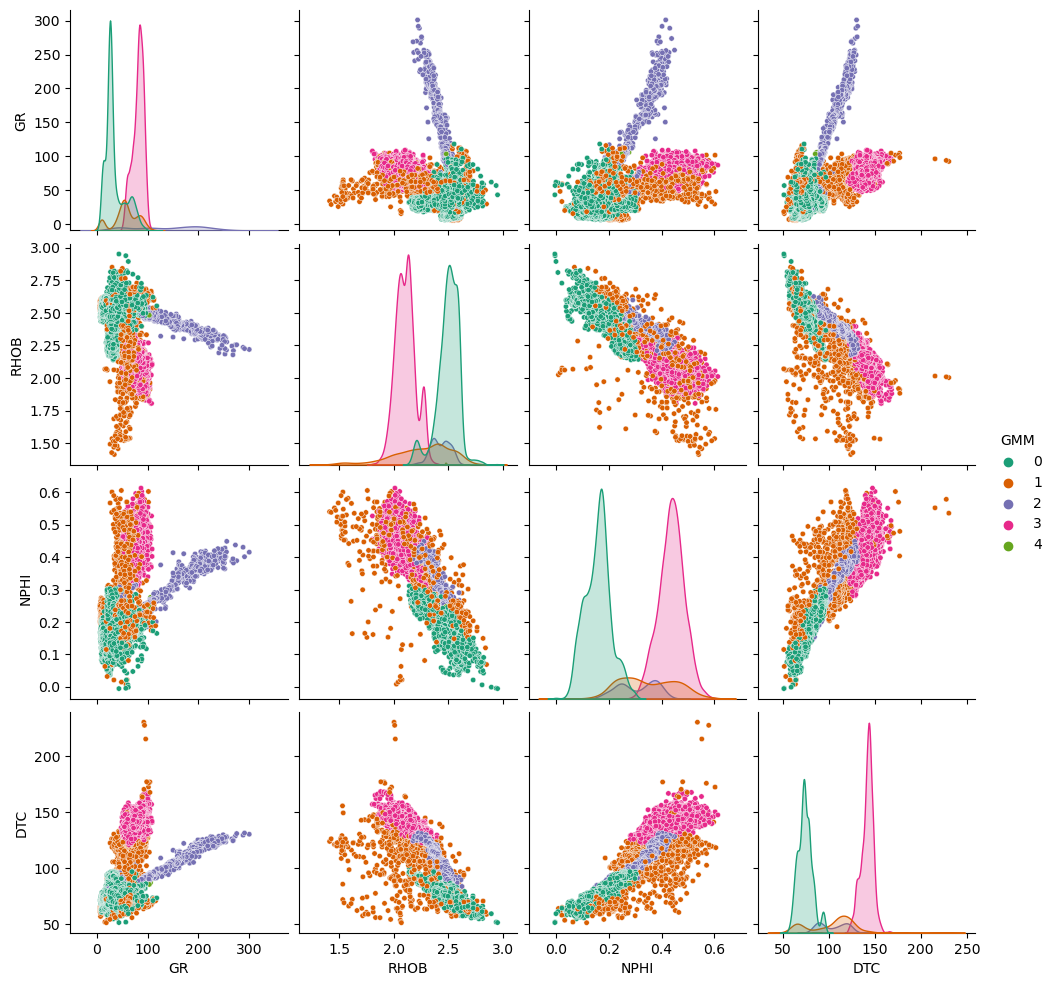

In [25]:
sns.pairplot(dfs_wells[0], vars=['GR', 'RHOB','NPHI', 'DTC'], hue='GMM', palette='Dark2',
             diag_kind='kde', plot_kws = {'s': 15, 'marker':'o', 'alpha':1})

This provides an informative plot that shows how data can be clustered for different logging curves. We can see that the GMM model provides some improvement in defining the clusters, especially in the DTC vs RHOB plot.

# Summary
In this article we have covered the basics for carrying out unsupervised cluster analysis using two popular algorithms - KMeans Clustering and Gaussian Mixture Modelling. Using an optimisation method we have determined that the optimum number of clusters was five, however, it is worth experimenting with more clusters to see if this provides a better match.

Once the clustering was complete, we saw multiple ways to visualise the results: a standard log plot setup, scatter plots and seaborn's pairplot. 

As K-Means clustering utilises spherical clusters, it may not always be appropriate to well log data and the subsurface. However, Gaussian Mixture Modelling does appear to provide a slight improvement in clustering.

## References

Bormann, Peter, Aursand, Peder, Dilib, Fahad, Manral, Surrender, & Dischington, Peter. (2020). FORCE 2020 Well well log and lithofacies dataset for machine learning competition [Data set]. Zenodo. http://doi.org/10.5281/zenodo.4351156
